18 cars passing a certain tollboth at different time of the day (x) with different speed (y)

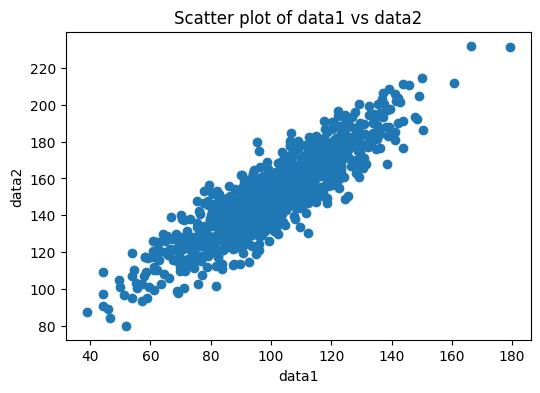

--- Pearson Correlation Summary ---
data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358
Covariance: 389.755
Pearsons correlation: 0.888



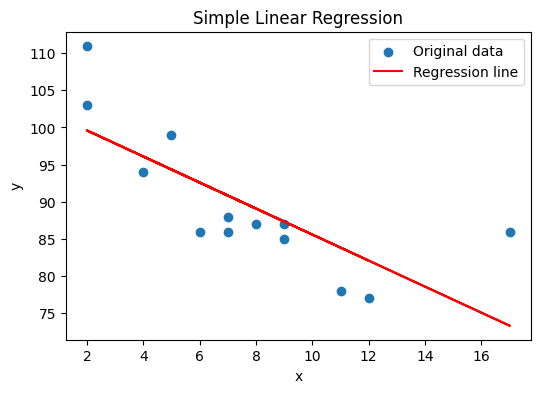

--- Simple Linear Regression Summary ---
Slope: -1.7512877115526118
Intercept: 103.10596026490066
Pearsons correlation: -0.759



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


--- Multiple Linear Regression ---
Coefficients: [-0.03295455  0.12477273]
Intercept: 37.13636363636361
Predicted CO2 for Weight=1400, Volume=950: 109.53409090909089 



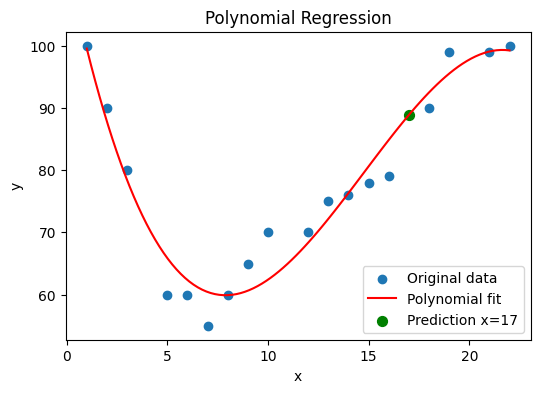

--- Polynomial Regression Summary ---
Predicted y for x=17: 88.87331269698001
R² score: 0.9432150416451026


In [2]:
# ======================================================
# Combined Correlation & Regression Analysis
# ======================================================

# --------------------------
# 1. Pearson's Correlation
# --------------------------
from numpy import mean, std, cov
from numpy.random import randn, seed
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

# Seed random number generator for reproducibility
seed(1)

# Prepare synthetic data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)

# Calculate covariance matrix
covariance = cov(data1, data2)

# Calculate Pearson's correlation coefficient
corr, _ = pearsonr(data1, data2)

# Plot scatter plot
plt.figure(figsize=(6,4))
plt.scatter(data1, data2)
plt.title("Scatter plot of data1 vs data2")
plt.xlabel("data1")
plt.ylabel("data2")
plt.show()

# Summarize
print('--- Pearson Correlation Summary ---')
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
print('Covariance: %.3f' % covariance[0][1])
print('Pearsons correlation: %.3f\n' % corr)

# -----------------------------------------------------
# 2. Simple Linear Regression
# -----------------------------------------------------
import scipy.stats as stats

# Sample data
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

# Fit linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Calculate Pearson correlation for these variables
corr_simple, _ = stats.pearsonr(x, y)

# Function to predict y-values
def predict_y(x):
    return slope * x + intercept

# Apply function to all x-values
y_model = list(map(predict_y, x))

# Plot
plt.figure(figsize=(6,4))
plt.scatter(x, y, label="Original data")
plt.plot(x, y_model, color='red', label="Regression line")
plt.title("Simple Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Print results
print('--- Simple Linear Regression Summary ---')
print('Slope:', slope)
print('Intercept:', intercept)
print('Pearsons correlation: %.3f\n' % corr_simple)

# -----------------------------------------------------
# 3. Multiple Linear Regression
# -----------------------------------------------------
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create sample dataset
data = {
    'Weight': [1200, 1500, 1700, 1300, 1600, 1800],
    'Volume': [800, 1000, 1200, 900, 1100, 1300],
    'CO2': [99, 110, 130, 105, 125, 140]
}

df = pd.DataFrame(data)

# Define independent variables and dependent variable
X = df[['Weight', 'Volume']]
y = df['CO2']

# Fit multiple linear regression
model = LinearRegression()
model.fit(X, y)

# Predict CO2 for a new car
predicted_CO2 = model.predict([[1400, 950]])

print('--- Multiple Linear Regression ---')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Predicted CO2 for Weight=1400, Volume=950:', predicted_CO2[0], '\n')

# -----------------------------------------------------
# 4. Polynomial Regression
# -----------------------------------------------------
import numpy as np
from sklearn.metrics import r2_score

# Sample data
x_poly = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y_poly = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

# Fit 3rd-degree polynomial
poly_model = np.poly1d(np.polyfit(x_poly, y_poly, 3))

# Predict y for a new value
predicted_y = poly_model(17)

# R² score
r2 = r2_score(y_poly, poly_model(x_poly))

# Plot
plt.figure(figsize=(6,4))
plt.scatter(x_poly, y_poly, label='Original data')
x_line = np.linspace(1, 22, 100)
plt.plot(x_line, poly_model(x_line), color='red', label='Polynomial fit')
plt.scatter(17, predicted_y, color='green', s=50, label='Prediction x=17')
plt.title('Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print('--- Polynomial Regression Summary ---')
print('Predicted y for x=17:', predicted_y)
print('R² score:', r2)


## Predict Future Values

Let us try to predict the speed of a car that passes the tollbooth at around 17 P.M